# Evaluation

In [113]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import os

## Load test data

In [114]:
_, (test_images, test_labels) = datasets.cifar10.load_data()
test_images =  test_images / 255.0
test_labels = tf.keras.utils.to_categorical(test_labels)

## Load

We are evaluating the following models:

1. Basic model with dropout
2. Batch normalisation
3. Increased dropout
4. Final model

In [115]:
models = {}

for model_name in os.listdir("../saved_model"):
    model_path = os.path.join("../saved_model", model_name)
    model = tf.keras.models.load_model(model_path)
    loss, acc = model.evaluate(test_images, test_labels)
    models[model_name] = {"loss": round(loss, 4), "acc": round(acc, 4)}

313/313 [==============================] - 15s 48ms/step - loss: 0.8712 - accuracy: 0.8626


## Evaluate models

In [163]:
x_pos = [i for i, _ in enumerate(models)]
plt.style.use('fivethirtyeight')


def create_bar_figure():
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xticks(x_pos)
    ax.set_xticklabels([m.replace("_", " ").capitalize() for m in models])
    ax.set_xlabel('Models')
    return fig, ax


### Loss

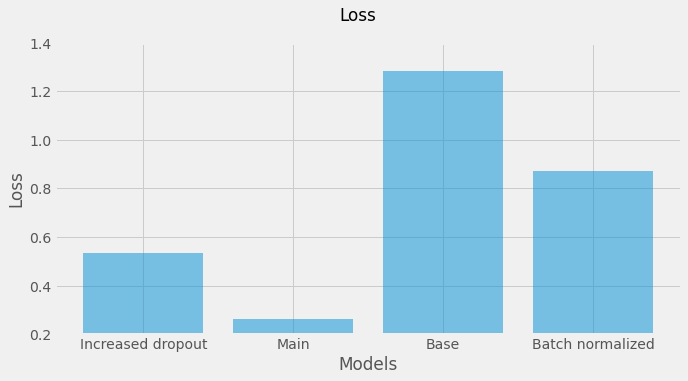

In [164]:
loss = [models[model]["loss"] for model in models]

fig, ax = create_bar_figure()
fig.suptitle("Loss")
ax.bar(x_pos, loss, align='center', alpha=0.5)
ax.set_ylim(max(round(min(loss), 1) - 0.1, 0), max(round(max(loss), 1) + 0.1, 1))
ax.set_ylabel("Loss")

plt.savefig("loss_bar.png")
plt.show()

### Accuracy

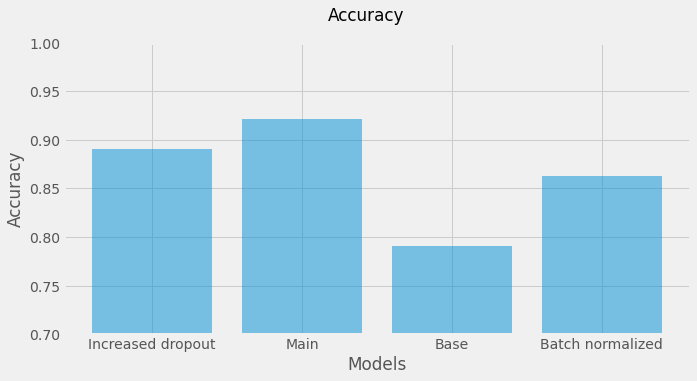

In [165]:
accuracy = [models[model]["acc"] for model in models]

fig, ax = create_bar_figure()
ax.bar(x_pos, accuracy, align='center', alpha=0.5)
ax.set_ylim(round(min(accuracy), 1) - 0.1, 1)
ax.set_ylabel("Accuracy")
fig.suptitle("Accuracy")

plt.savefig("accuracy_bar.png")
plt.show()

In [166]:
for name, model in models.items():
    print(f"{name}: loss: {model['loss']}, acc: {model['acc']}")

Increased_Dropout: loss: 0.5328, acc: 0.8905
Main: loss: 0.2643, acc: 0.9215
Base: loss: 1.2824, acc: 0.7913
Batch_Normalized: loss: 0.8712, acc: 0.8626


In [167]:
import re
from matplotlib import image as mpimg
import math

img_paths = os.listdir("stats/png/")

def create_fit_figure(*pngs):
    def create_subplot(a, p):
        a.imshow(mpimg.imread(p))
        a.axis('off')
        a.grid(b=None)
        a.set_title(re.match(r"^stats/png/(.*)_(epoch_loss|epoch_accuracy)\.png$", p).group(1).replace("_", " ").capitalize())

    fig, ax = plt.subplots(int(math.sqrt(len(pngs))), int(math.sqrt(len(pngs))), figsize=(9,6))
    for p, a in zip(pngs, ax.flatten()):
        create_subplot(a, p)
    return fig, ax



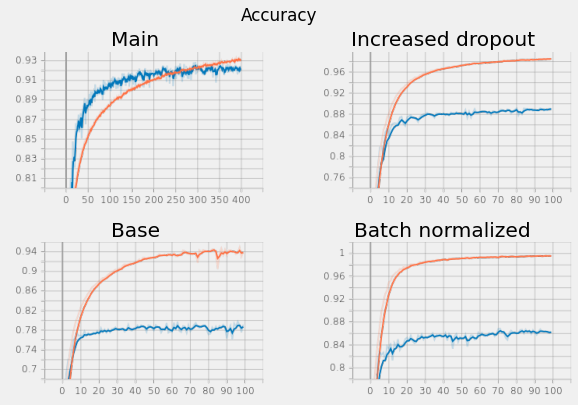

In [171]:
fig, ax = create_fit_figure(*[os.path.join("stats/png", png) for png in img_paths if "epoch_accuracy" in png])
fig.suptitle("Accuracy")
plt.show()
fig.savefig("accuracy_plot.png")

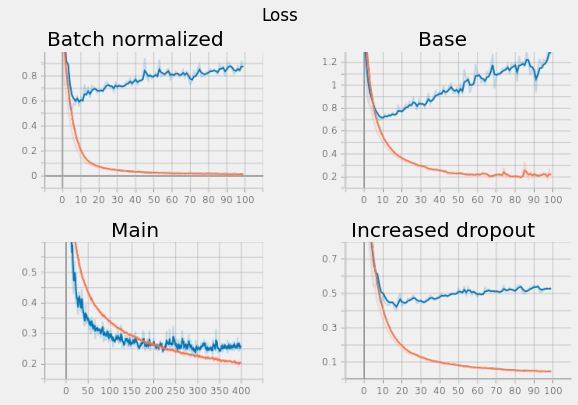

In [170]:
fig, ax = create_fit_figure(*[os.path.join("stats/png", png) for png in img_paths if "epoch_loss" in png])
fig.suptitle("Loss")
fig.savefig("loss_plot.png")
plt.show()
